## Encoding 에 대해 알아봅시다.

#### ASCII (American Standard Code for Information Interchange)
: 정수 0 ~127 (총 128 개의 정수)만을 사용(7 Bit 사용)하여, 33 개의 제어 문자(출력 불가능)들과 공백,알파벳,숫자 등과 같은 문자(출력 가능) 95 개를 표현
+ 아래의 표는 ASCII Encoding 을 통해 표현 가능한 문자들과, 각 문자들에 사상된 정숫값(왼쪽부터 10진수,8진수,16진수)을 보여줌
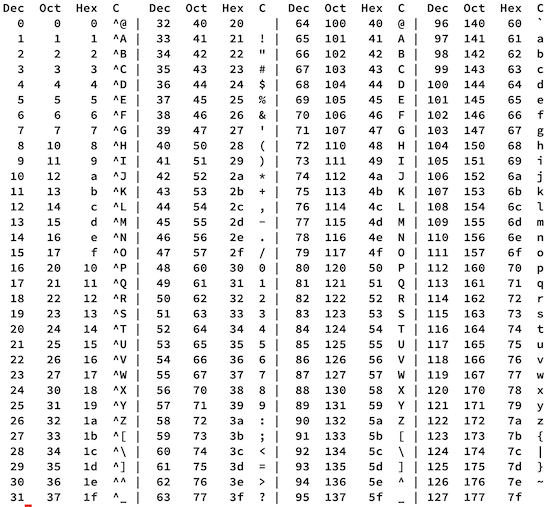

+ ASCII Encoding 에 따라, 아래의 정수들을, 정수 각각에 매핑된 문자로 변환하고, 완성된 문자열을 제출하세요.<br><br>
$$[99, 114, 121, 112, 116, 111, 123, 65, 83, 67, 73, 73, 95, 112, 114, 49, 110, 116, 52, 98, 108, 51, 125]$$

In [1]:
asciis = [99,114,121,112,116,111,123,65,83,67,73,73,95,112,114,49,110,116,52,98,108,51,125]

''.join([chr(c) for c in asciis])

'crypto{ASCII_pr1nt4bl3}'

#### 16 진수 Encoding (Hex Encoding)
: 문자를 구성하는 각각의 Byte 들을 표현하는 방법들 중 하나로, 하나의 Byte 를 2개의 16 진수(16 진수 한 개로 4 Bits 표현 가능)로 표현
+ 16 진수는, 0 ~ 15 의 정수를 아래와 같이, 10 개의 정수(0 ~ 9) 와, 6개의 알파벳 (a ~ f) 으로 표현
  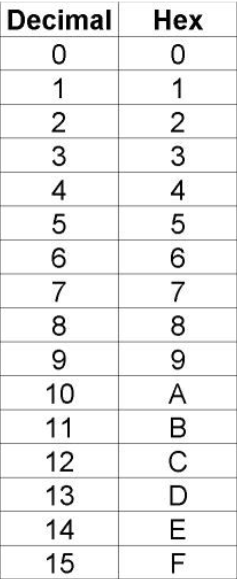
<br><br>
+ 아래의 16진수로 Encoding 된 문자열이 있습니다. 해당 문자열을 일반 텍스트로 Decoding 한 후, 결과를 제출하세요.<br><br>
<center>'63727970746f7b596f755f77696c6c5f62655f776f726b696e675f776974685f6865785f737472696e67735f615f6c6f747d'</center>

In [2]:
bytes.fromhex('63727970746f7b596f755f77696c6c5f62655f776f726b696e675f776974685f6865785f737472696e67735f615f6c6f747d').decode()

'crypto{You_will_be_working_with_hex_strings_a_lot}'

#### Base64
: 8-Bit 단위의 바이너리 데이터(Zip, np4, mp3 등의 미디어 파일, 실행 파일 ...)를, 64 개의 출력가능 ASCII 문자로 변환하는 방법으로, 이는 상이한 시스템 간 ASCII로 Encoding하여 전송할 때 발생하는 아래의 문제들을 피하기 위해서임 
+ ASCII는 7 bits Encoding인데 나머지 1bit를 처리/인식하는 방식이 시스템 별로 상이하다 (8-Bits ASCII 그대로 보내게 될 경우, 원 데이터가 왜곡이 될 수 있음)
+ 일부 제어문자 (e.g. Line ending)의 경우 시스템 별로 다른 코드값을 갖는다.
<br><br>
+ 1. Encoding 전, 바이너리 데이터가 3 Bytes(6 과 8 의 최소 공배수는 24, 24 Bits = 3 Bytes) 단위로 끊어지는지 확인
   + 그렇지 않다면, 데이터의 끝에 최소한의 0을 채워 넣어, 바이너리 데이터가 3 Bytes 단위로 끊어지도록 함 (Zero Padding)
  2. 바이너리 데이터를 앞(좌)에서부터 6 Bits 단위로 끊음
  3. 아래의 Base64 Encoding 표에 따라, 각각의 6 Bits 단위의 이진수를, 수의 크기에 따라 매핑된 출력 가능 ASCII 문자로 변환
    + 이때, 뒤에 Zero Padding 으로 추가되어 '000000' 인 부분은 '=' 문자로 변환 (의미없는 padding 임을 알리기 위해 'a' 가 아닌 '=' 로 변환)
  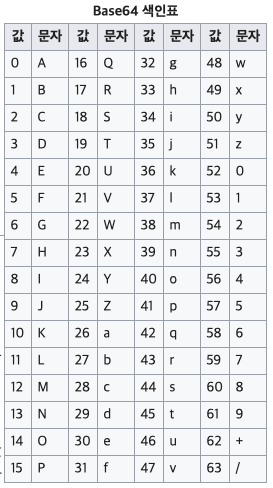
+ 위의 과정을 통해, 평균적으로 base64 인코딩을 통해, 문자열의 길이가 인코딩 전 대비 33% 정도 증가하는 것을 확인할 수 있음
> + base64 인코딩의 과정을 통해, 문자열은 3 Byte 단위가 되도록 Padding 이 추가될 것.
>   + 1 Byte → 6 bit * ($\lceil\frac{1}{3}\rceil$ * 4) = 24 chars
>   + 2 Byte → 6 bit * ($\lceil\frac{2}{3}\rceil$ * 4) = 24 chars
>   + 3 Byte → 6 bit * ($\lceil\frac{3}{3}\rceil$ * 4) = 24 chars
>   + 4 Byte → 6 bit * ($\lceil\frac{4}{3}\rceil$ * 4) = 48 chars
>   + ...
>   + n Byte → 6 bit * ($\lceil\frac{n}{3}\rceil$ * 4) $ \approx $ n*$\frac{4}{3}$ chars

In [3]:
import base64                     ## Base64 라이브러리

In [4]:
h2b = bytes.fromhex('72bca9b68fc16ac7beeb8f849dca1d8a783e8acf9679bf9269f7bf')    ## Decoding : Hex -> Byte 
base64.b64encode(h2b).decode()                                                   ## Encoding : Byte -> Base64 

'crypto/Base+64+Encoding+is+Web+Safe/'

#### 장문의 텍스트를 Encoding 하는 법
1. 장문의 텍스트를, 문자 단위로 쪼갬
2. 쪼개진 문자들 각각을 다시 Byte 단위로 쪼갬 
 + 한글 등과 같은 멀티 바이트 문자들(UTF-8 과 같은 Unicode)이 존재하기 때문
3. 각각의 Byte 들을 16진수로 Encoding 후, Encoding 된 각각의 Byte 들을 이어붙임(Concatenate)
 + 만일 10진수로 Encoding 하고자 한다면, 16진수로 Encoding 후, 해당 16진수를 10 진수로 변환
> '헬로Hello' 텍스트를 16진수로 Encoding 하고자 하는 경우 가정
> <br><br>'헬로Hello' 문장은, 다음과 같은 문자들로 구성
> + '헬' : 16 진수 0xed97ac 로 표현
> + '로' : 16 진수 0xeba19c 로 표현
> + 'H' : 16 진수 0x48
> + 'e' : 16 진수 0x65
> + 'l' : 16 진수 0x6c
> + 'l' : 16 진수 0x6c
> + 'o' : 16 진수 0x6f  
>> 위 문자들 각각을 16진수 Encoding 시킨 것을, 이어붙임 <br><br> <center>0xed97aceba19c48656c6c6f</center> 

+ 아래의 큰 자연수를 원래의 텍스트로 Decoding 하여 제출하세요.(Pycryptodome 라이브러리 사용할 것)
<br><br>
<center>11515195063862318899931685488813747395775516287289682636499965282714637259206269</center>

In [15]:
from Crypto.Util.number import *

In [6]:
long_to_bytes(11515195063862318899931685488813747395775516287289682636499965282714637259206269).decode()

'crypto{3nc0d1n6_4ll_7h3_w4y_d0wn}'

+ 아래의 텍스트를 10 진수로 Encoding 하여 제출하세요.(Pycryptodome 라이브러리 사용할 것)
<br><br>
<center>'이게바로 16-base Encoding'</center>

In [4]:
bytes_to_long('Th15_1s_called_B4se64_3ncoding'.encode())

582555709841987689609101291341298903941603047875126038031350402252369511

### XOR 연산에 대해 알아봅시다

#### XOR 연산
: 두 바이너리 데이터를 피연산자로 하는 비트별(Bitwise) 연산들 중 하나로, 두 비트 값이 같은 경우 0, 두 비트 값이 다른 경우 1 이 됨. 연산의 기호는 ⊕ 사용
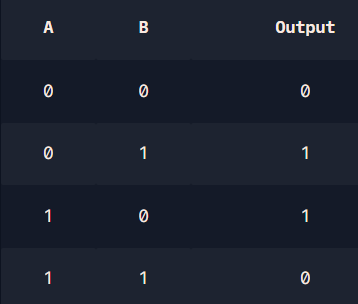

+ 아래의 텍스트를 구성하는 각 문자를 자연수 13과 XOR 하여, 새로운 정수로 변환하고, 해당 정수들 각각에 매핑된 문자로 변환하여 완성된 문자열을 제출하시오
<br><br><center>'label'</center>

In [5]:
''.join([chr(ord(ch)^13) for ch in 'label'])

'aloha'

+ 위의 제시된 문자열을 대상으로, 똑같은 방법으로 새로운 문자열로 변환하되, Python 의 pwntools 라이브러리를 사용하시오.

In [6]:
from pwn import xor

In [7]:
xor(b'label',13).decode()

'aloha'

#### XOR 연산의 특징
+ 교환법칙
  + $A ⊕ B = B ⊕ A$
+ 연관 법칙
  + $A ⊕ (B ⊕ C) = (A ⊕ B) ⊕ C$
+ 항등원 존재 (항등원 0)
  + $A ⊕ 0 = A$
+ 역원 존재 (자기 자신)
  + $A ⊕ A = 0$

+ KEY1, KEY2, KEY3 의 3개의 키가 있다고 가정하자. 그리고, KEY1 값과, KEY1-KEY2 XOR 값, KEY2-KEY3 XOR 값, 마지막으로 FLAG 값과 KEY1,KEY2,KEY3 끼리 XOR 한 값이 아래와 같다고 할 때, FLAG의 값이 무엇인지 16 진수로제출하시오. 
  + KEY1 = a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313
  + KEY2 ⊕ KEY1 = 37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e<br>
  + KEY2 ⊕ KEY3 = c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1<br>
  + FLAG ⊕ KEY1 ⊕ KEY3 ⊕ KEY2 = 04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf

In [8]:
KEY1 = int.from_bytes(bytes.fromhex('a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313'), byteorder="big")
XOR_12 = int.from_bytes(bytes.fromhex('37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e'), byteorder="big")
XOR_23 = int.from_bytes(bytes.fromhex('c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1'), byteorder="big")
XOR_F123 = int.from_bytes(bytes.fromhex('04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf'), byteorder="big")

KEY2 = KEY1 ^ XOR_12
KEY3 = KEY2 ^ XOR_23

FLAG = XOR_F123 ^(KEY1^KEY2^KEY3)

long_to_bytes(FLAG).decode()

'crypto{x0r_i5_ass0c1at1v3}'

#### XOR 연산의 특징을 이용하여, 아래 문제들을 해결하시오.

+ 원문의 각 Byte 마다, 똑같은 1 Byte 크기의 수를 XOR 하여 암호문을 만들고, 아래와 같이 16진수로 Encoding 하였다. 해당 암호문을 해독하여 제출하시오. (단, 원문의 형식은 'crypto{...}' 임)
<br><br><center>73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d</center>

In [9]:
enc = '73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d' 

secret = ord(bytes.fromhex(enc[:2]).decode())^ord('c')

dec = ''

for i in range(0,len(enc),2):
    dec += hex(secret^int.from_bytes(bytes.fromhex(enc[i:i+2]), byteorder="big"))[2:]

bytes.fromhex(dec).decode()

'crypto{0x10_15_my_f4v0ur173_by7e}'

+ 원문을, 어떤 정수와 XOR 연산하여,아래의 암호화된 16진수를 만들었다. 암호문을 해독하여 제출하시오. (단, 원문의 형식은 'crypto{...} 임')
<br><br><center>0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104</center>

In [10]:
## ----------------------- Let's guess the key first -------------------------------------
enc = '0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104'
secret = ''
dec = 'crypto{'

for i in range(0,len(bytes.hex(b'crypto{')),2):
    key_ch = int.from_bytes(bytes.fromhex(bytes.hex(b'crypto{')[i:i+2]), byteorder="big")
    secret += chr(key_ch^ord(bytes.fromhex(enc[i:i+2]).decode()))
  
key_ch = int.from_bytes(bytes.fromhex(bytes.hex(b'}')), byteorder="big")
secret += '      ' + chr(key_ch^ord(bytes.fromhex(enc[-2:]).decode()))
print(secret)
## ----------------------------------------------------------------------------------------

myXORke      y


<b> - Key 의 앞 7자 'myXORke'를 통해, 다음 8번째 자는 'y' 임을 예측 가능
<br><br> - 16진수로 Encoding 된 텍스트를 Byte 단위로 끊었을 때, 원문의 길이는 42 Byte 임을 예측 가능
<br><br> - 만일, 'myXORkey' 의 8 Byte 단위의 텍스트가 반복됨으로써 Key 가 만들어진다면,42 mod 8 = 2 로, 원문의 끝 문자 '}' 를 암호화하기 위해 사용되는 문자는 'y' (myXORkey 의 최좌측에 있는 y)라고 예측해볼수 있다. 그리고, 실제 확인해 본 결과, 끝 문자 '}' 를 암호화하기 위해 사용되는 문자는 'y'임을 확인

In [11]:
secret = 'myXORkey'*(len(enc)//16) + 'my'

long_to_bytes(int.from_bytes(bytes.fromhex(enc), byteorder="big") ^ bytes_to_long(secret.encode())).decode()

'crypto{1f_y0u_Kn0w_En0uGH_y0u_Kn0w_1t_4ll}'

<br><br>
+ 비밀정보가 포함된 이미지 2개 각각(상 - flag.png, 하-lemur.png)에, 같은 정수값을 XOR 하여, 아래와 같이 노이즈가 낀 이미지로 변환하였다. 이미지의 노이즈를 제거하고, 원 이미지에 포함된 비밀 정보(FLAG) 를 제출하시오.

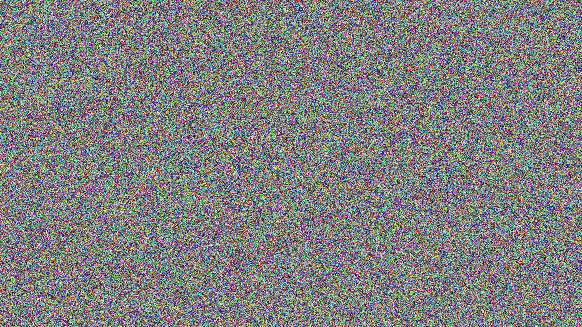

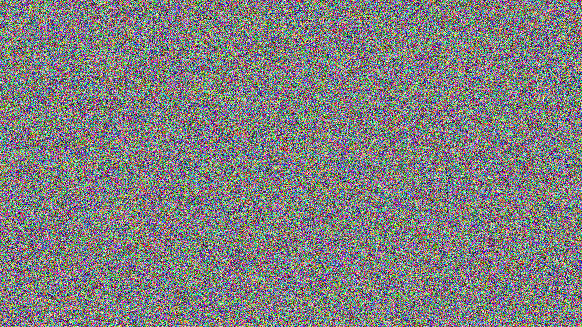

> [추가]
> + 1. 아래의 그림에서처럼, 원래의 디지털 이미지와 같은 Shape 을 가진 이미지를 생성함. 여기서, 생성된 이미지의 각 Pixel 값들이, 원래의 디지털 이미지의 Pixel 값들을 암호화시키는 Key 역할을 수행
> + 2. 원래의 디지털 이미지의 Pixel 값들과, Key 역할을 할 생성된 이미지의 Pixel 값들을 XOR 함.
    + 두 이미지는 같은 Shape 을 가지므로, 대응되는 위치 (서로 같은 위치)의 Pixel 들끼리 XOR 시키면 됨.
> + 3. 암호화된 이미지 (Noise 낀 이미지) 완성!!<br><br>
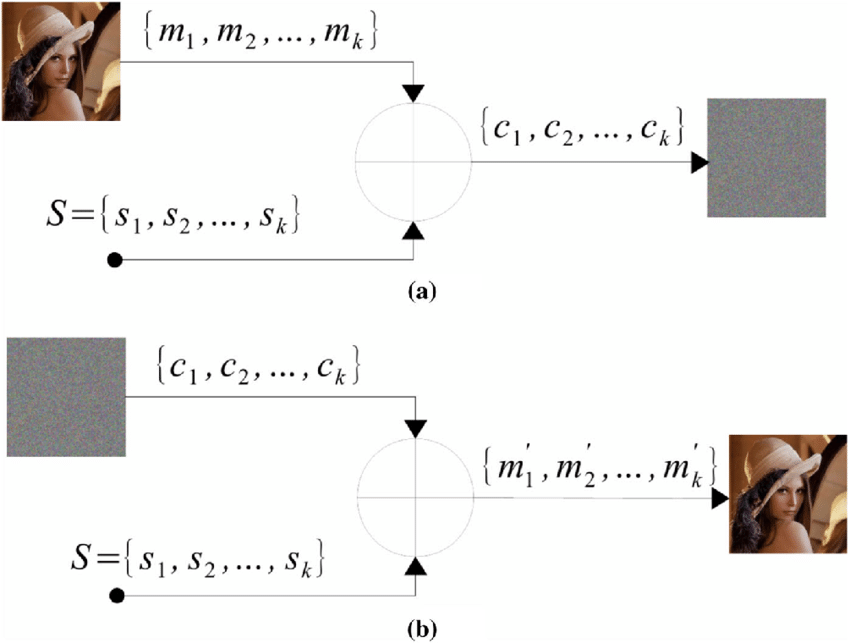
> + XOR 연산의 특징을 이용한다면, 위의 이미지 암호화 과정을 통해 다음과 같은 사실을 알 수 있음
    + 같은 Key 로 암호화 된 두 원본 이미지들을 서로 XOR 시킨 결과물은, 2개의 원본 이미지들을 XOR 시킨 것과 같음
      >> 같은 크기   ($N*M$) 를 가진 원본 이미지 1과 원본 이미지가 있음. 원본 이미지 1 을 $S_1$ 이라고 할 때,$$S1 = \{\{R_{11},G_{11},B_{11}\},\{R_{12},G_{12},B_{12}\},\{R_{13},G_{13},B_{13}\},...\{R_{NM},G_{NM},B_{NM}\}\}$$ $$S2 = \{\{R_{11}^{'},G_{11}^{'},B_{11}^{'}\},\{R_{12}^{'},G_{12}^{'},B_{12}^{'}\},\{R_{13}^{'},G_{13}^{'},B_{13}^{'}\},...\{R_{NM}^{'},G_{NM}^{'},B_{NM}^{'}\}\}$$ 라고 나타낼 수 있음. (여기서, $R_{ik}, G_{ik}, B_{ik}$ 는 각각, (i ,k) 위치의 Red, Blue, Green 채널의 값임)<br><br>
      >> + 두 이진수 산의 XOR 연산은, 각 비트(=채널)값들과 독립적으로 이뤄지므로, 두 이미지 간의 XOR 연산은, 간단히 $S_{1} ⊕ S_{2}$ 로 표현하겠음
      >> + 암호화에 사용된 Key 이미지를 $K$ 라고 했을 때, 암호화 후의 이미지 $E_{1} = S_{1} ⊕ K$, $E_{2} = S_{1} ⊕ K$ 로 표현
      >> + 두 암호화된 이미지들에 대한 XOR 연산값은 아래와 같음
      >>    $$E_{1} ⊕ E_{2} = (S_{1} ⊕ K) ⊕ (S_{2} ⊕ K)$$. 여기서, 교환 법칙에 따라 $$(S_{1} ⊕ K) ⊕ (S_{2} ⊕ K) = (S_{1} ⊕ K) ⊕ (K ⊕ S_{2})$$. 이후 연관 법칙에 따라 $$ (S_{1} ⊕ K) ⊕ (K ⊕ S_{2}) =  ((S_{1} ⊕ K) ⊕ K) ⊕ S_{2} $$ $$ ((S_{1} ⊕ K) ⊕ K) ⊕ S_{2}  = ((S_{1} ⊕ (K ⊕ K)) ⊕ S_{2}$$ $$((S_{1} ⊕ (K ⊕ K)) ⊕ S_{2} = (S_{1} ⊕ 0) ⊕ S_{2} = S_{1} ⊕ S_{2} $$

In [13]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow

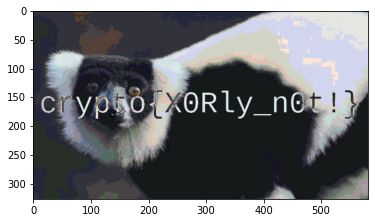

In [16]:
img1 = Image.open('lemur.png') 
img2 = Image.open('flag.png')

# 각 이미지에 대한 Pixel 값들에 대한 List 를 numpy array 로 변환
n1 = np.array(img1)             
n2 = np.array(img2)


n_image = np.bitwise_xor(n1, n2).astype(np.uint8)
imshow(np.asarray(Image.fromarray(n_image)))

--------------------------------